In [1]:
from pyforest import *

In [2]:
raw_data = pd.read_csv('../../dataset/breastCancer.csv')

<IPython.core.display.Javascript object>

In [3]:
raw_data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
raw_data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [5]:
raw_data.shape

(699, 11)

In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [7]:
df = raw_data.copy()

In [8]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [9]:
df[~df['bare_nucleoli'].str.isdigit()]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [10]:
df = df.drop('id', axis=1)

In [11]:
df['bare_nucleoli'] = df['bare_nucleoli'].replace('?', np.nan)

<IPython.core.display.Javascript object>

In [12]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype(float)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

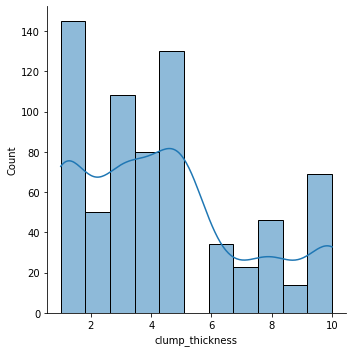

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

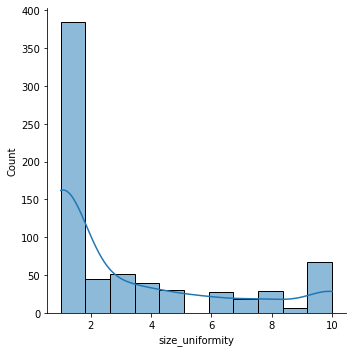

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

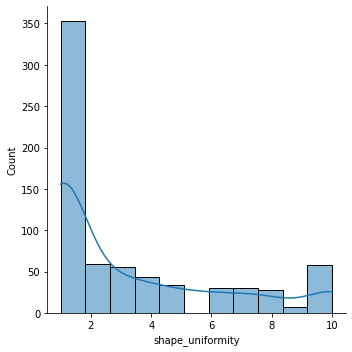

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

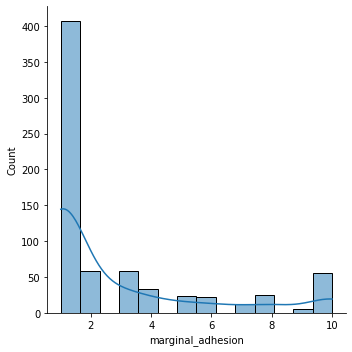

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

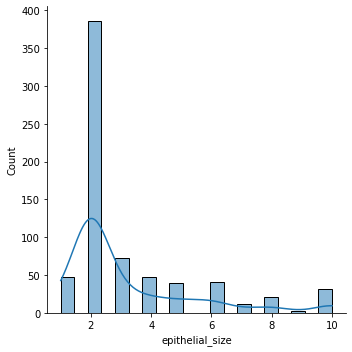

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

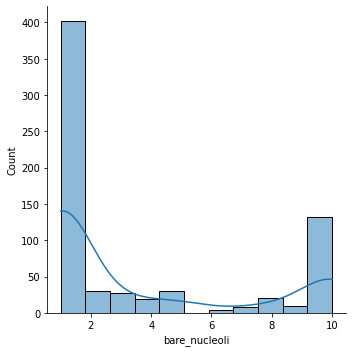

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

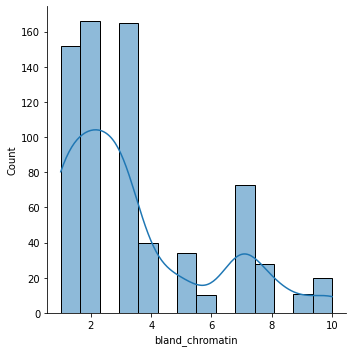

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

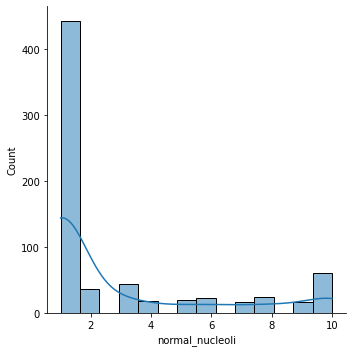

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

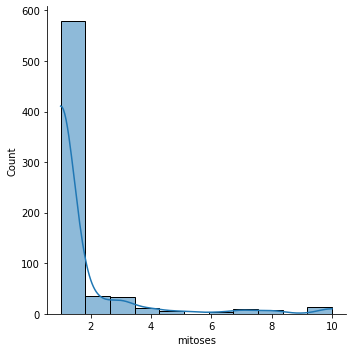

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

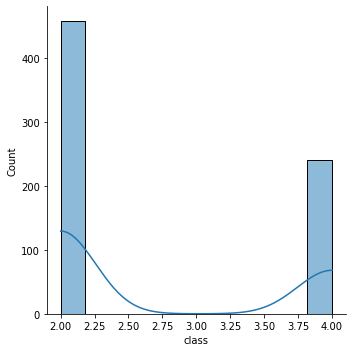

In [13]:
for i in df.describe().columns:
    sns.displot(df[i].dropna(), kde=True)
    plt.show()

In [14]:
df['bare_nucleoli'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: bare_nucleoli, dtype: int64

In [15]:
df['bare_nucleoli'].median()

1.0

In [16]:
df['bare_nucleoli'] = df['bare_nucleoli'].replace(np.nan, df['bare_nucleoli'].median())

<IPython.core.display.Javascript object>

In [17]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

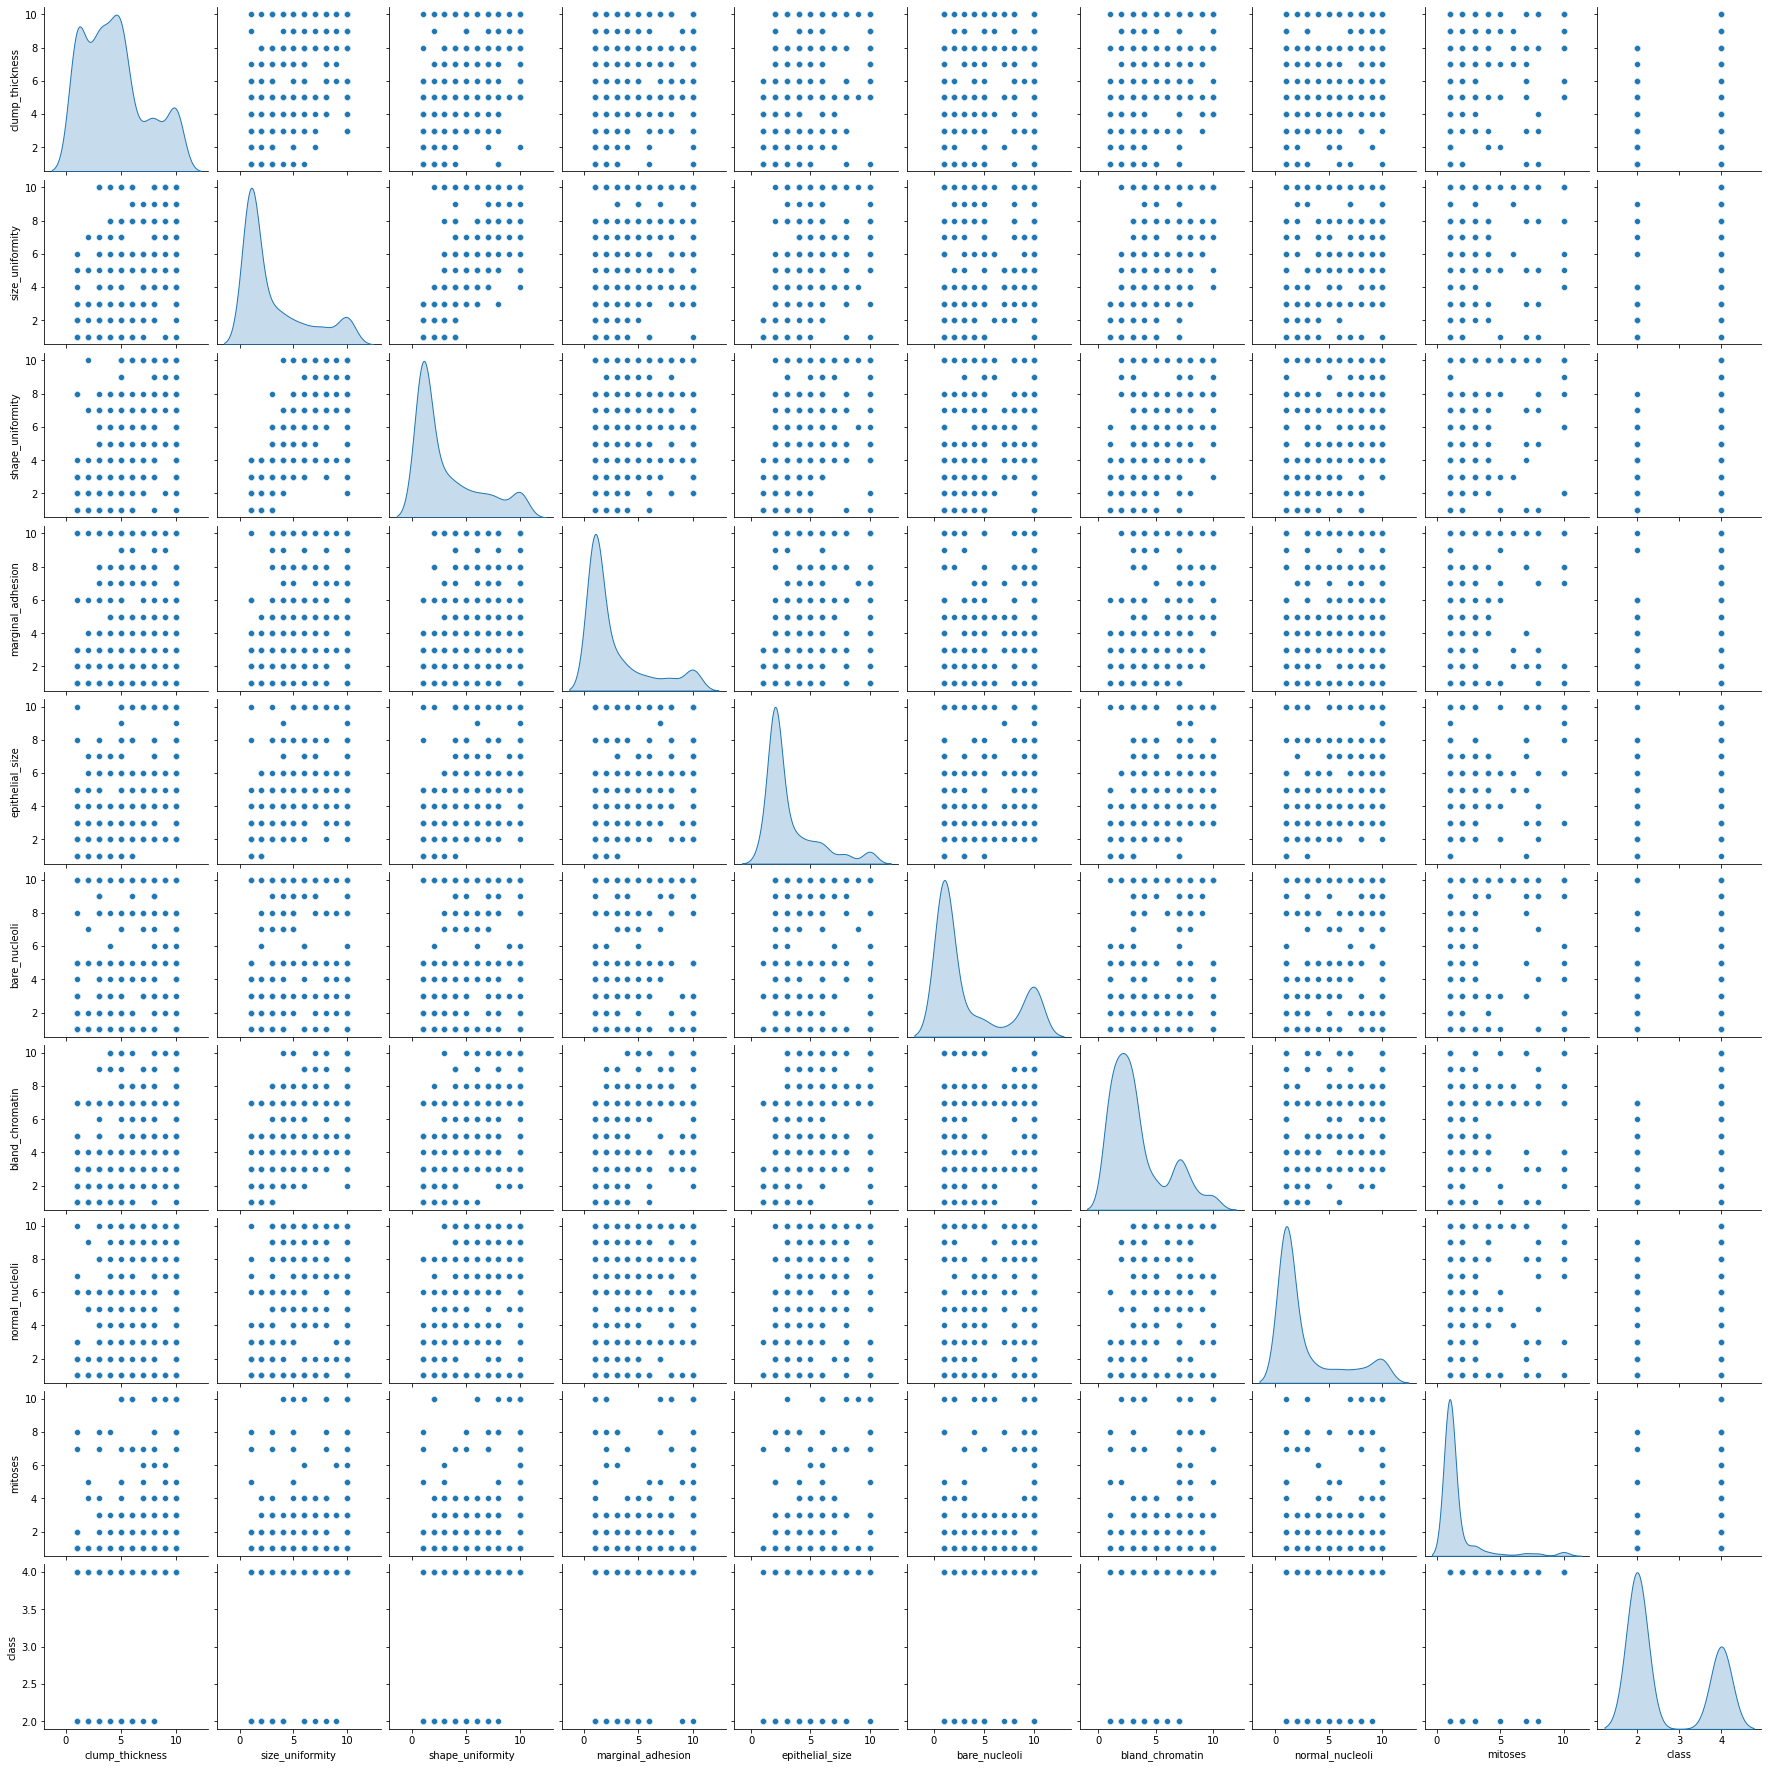

In [18]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [19]:
df.corr(numeric_only=True)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

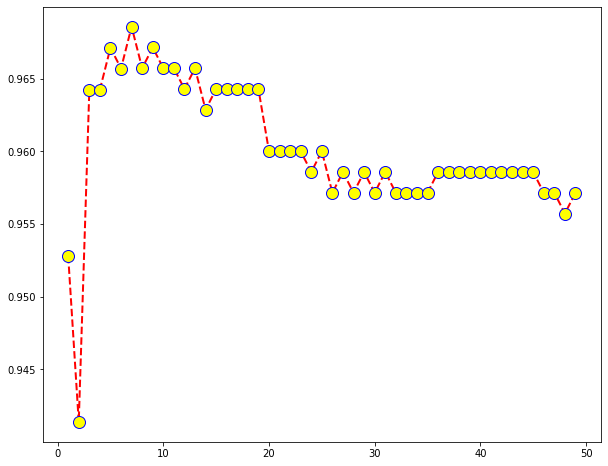

In [25]:
scores = []

for i in range(1, 50):
    knn = KNeighborsClassifier(i)
    scores_ = cross_val_score(knn, X, y, cv=10)
    scores.append(scores_.mean())
    
plt.figure(figsize=(10, 8))
plt.plot(list(range(1, 50)), scores, color='r', marker='o', linestyle='dashed', linewidth=2, markersize=12, mfc='yellow', mec='blue')
plt.show()

In [22]:
KNN = KNeighborsClassifier(n_neighbors=7, weights='uniform')
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
print(KNN.score(X_train, y_train))
print(KNN.score(X_test, y_test))

0.9775051124744376
0.9571428571428572


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

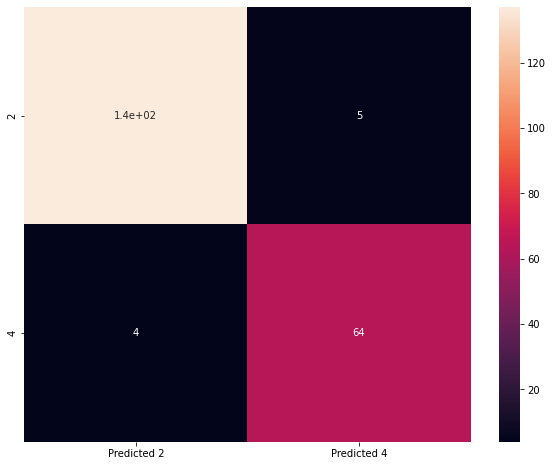

In [24]:
from sklearn import metrics

predicted = KNN.predict(X_test)

cm = metrics.confusion_matrix(y_test, predicted, labels=[2, 4])
df_cm = pd.DataFrame(cm, index=[2, 4], columns=['Predicted 2', 'Predicted 4'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True)
plt.show()

In [56]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       142
           4       0.93      0.94      0.93        68

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [74]:
from sklearn.svm import SVC

svmodel = SVC(gamma='scale', C=1.5)
svmodel.fit(X_train, y_train)

SVC(C=1.5)

In [75]:
print(svmodel.score(X_train, y_train))
print(svmodel.score(X_test, y_test))

0.9795501022494888
0.9476190476190476


In [76]:
predicted = svmodel.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       142
           4       0.90      0.94      0.92        68

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.94       210
weighted avg       0.95      0.95      0.95       210



In [72]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C': [0.5, 1.0, 1.5, 2, 3],
#     'kernel': ['linear', 'poly', 'sigmoid', 'precomputed'],
    'gamma': [0.5, 1, 'scale', 'auto']
}

rs = RandomizedSearchCV(SVC(), params, cv=10)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.5, 1.0, 1.5, 2, 3],
                                        'gamma': [0.5, 1, 'scale', 'auto']})

In [73]:
rs.best_params_

{'gamma': 'scale', 'C': 1.5}